We start with brats data but this approach can be generalized once we have the data from the Inselspital.

## Idea
The basic idea is to provide the data in two blobs. The first blob X contains the full slices its would e.g. look like:

* X(nSlices, 1, 160, 160) prob. an integer see DCIM files

The second blob  has the same dimension, but contains the coded regions.

* Y(nSlices, 1, 160, 160) prob. is an integer with the coding e.g. (needs to be defined)
	* 1 Cancer GBM
	* 2 Metas
	* 3 Not coded
	* 4 Healthy 




### Loading of the data

#### Transformation from mha to hdf5
The data is provided in the `mha` file format. I could not find a suitable reader for python, therefore I transformed the data to the hdf5 format from matlab. The code for doing so is created with the R-Script `CreateMatLabConversionCode.R` (von hinten durch die Brust ins Auge).

#### Creation of the data
The dimension of a single Patient is (176, 260, 160) for z,x,y. From the z-direction 16 slices are taken from 65 to 145 with stepsize 5. The y direction is cropped from 20:180. In the beginning we only consider the `T1C` layer. So finally we have for each patient a (16,1,160,160) blob for X. Lets have a look at the data.

#### T1c and Y for the slices under consideration

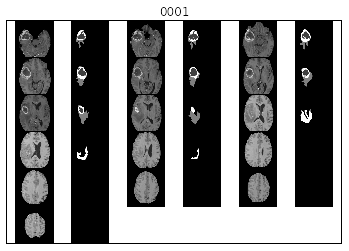

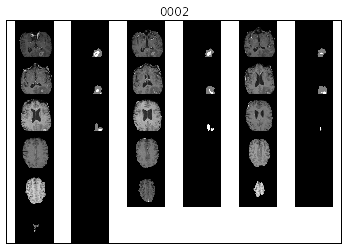

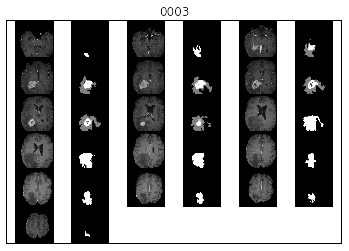

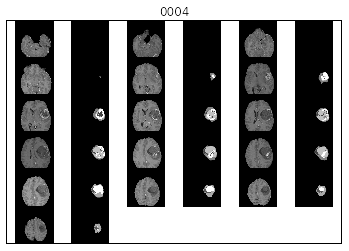

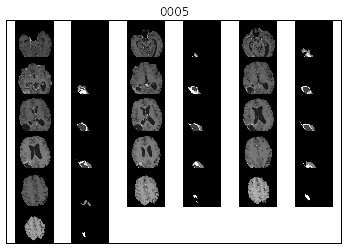

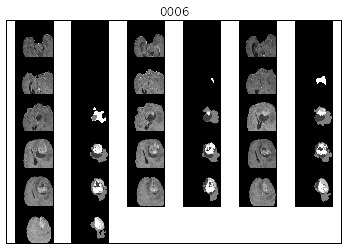

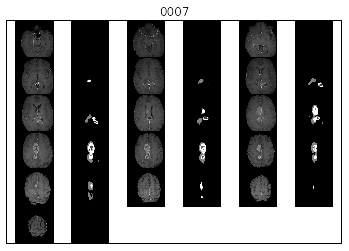

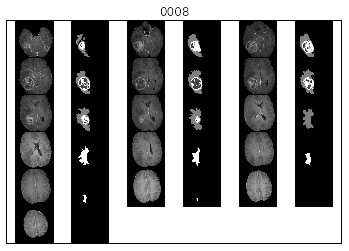

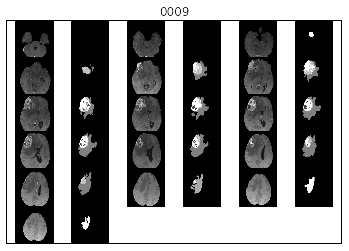

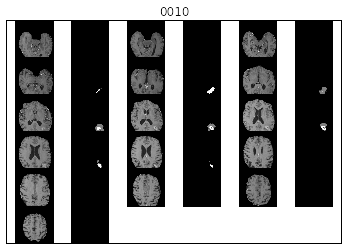

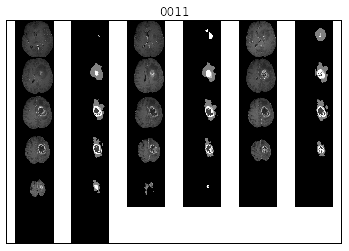

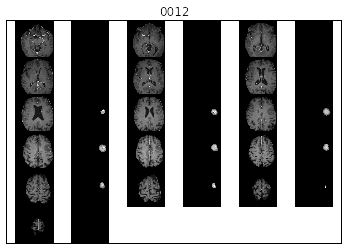

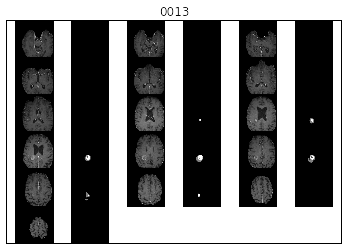

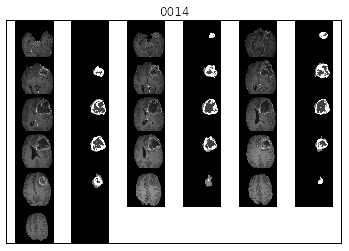

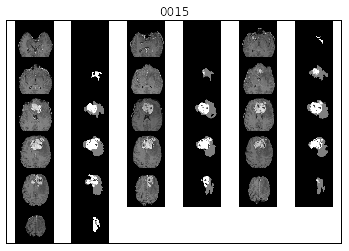

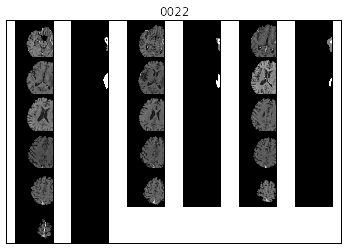

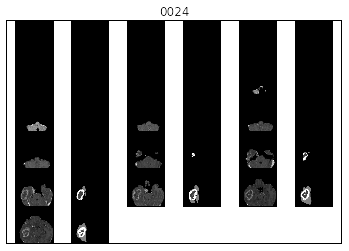

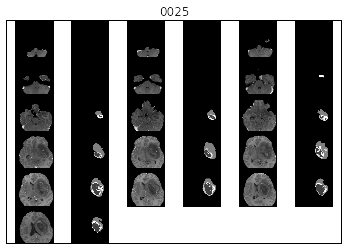

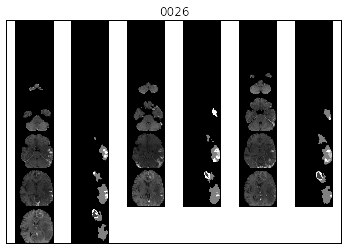

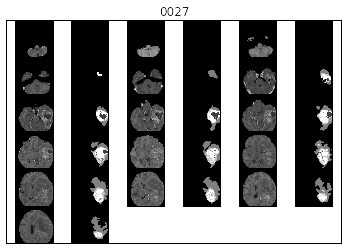

In [1]:
from create_data import createTrainingData
%matplotlib inline
X,Y = createTrainingData()

In [2]:
X.shape, Y.shape, len(range(65, 145, 5)),320/16

((320, 1, 160, 160), (320, 1, 160, 160), 16, 20)

In [3]:
import pickle
with open('data/data.pkl', "wb") as f:
    pickle.dump([X,Y], f)

In [4]:
%ls -rtlh data/

total 287880
-rw-r--r--  1 oli  staff   141M Mar 27 14:57 data.pkl
